# Decision trees

https://scikit-learn.org/stable/modules/tree.html

 * pruning: helps agains overfitting
 * decision trees within an ensemble $\rightarrow$ stability
 * balance data sets $\rightarrow$ else you get biased trees

In [4]:
from pylab import *

In [56]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

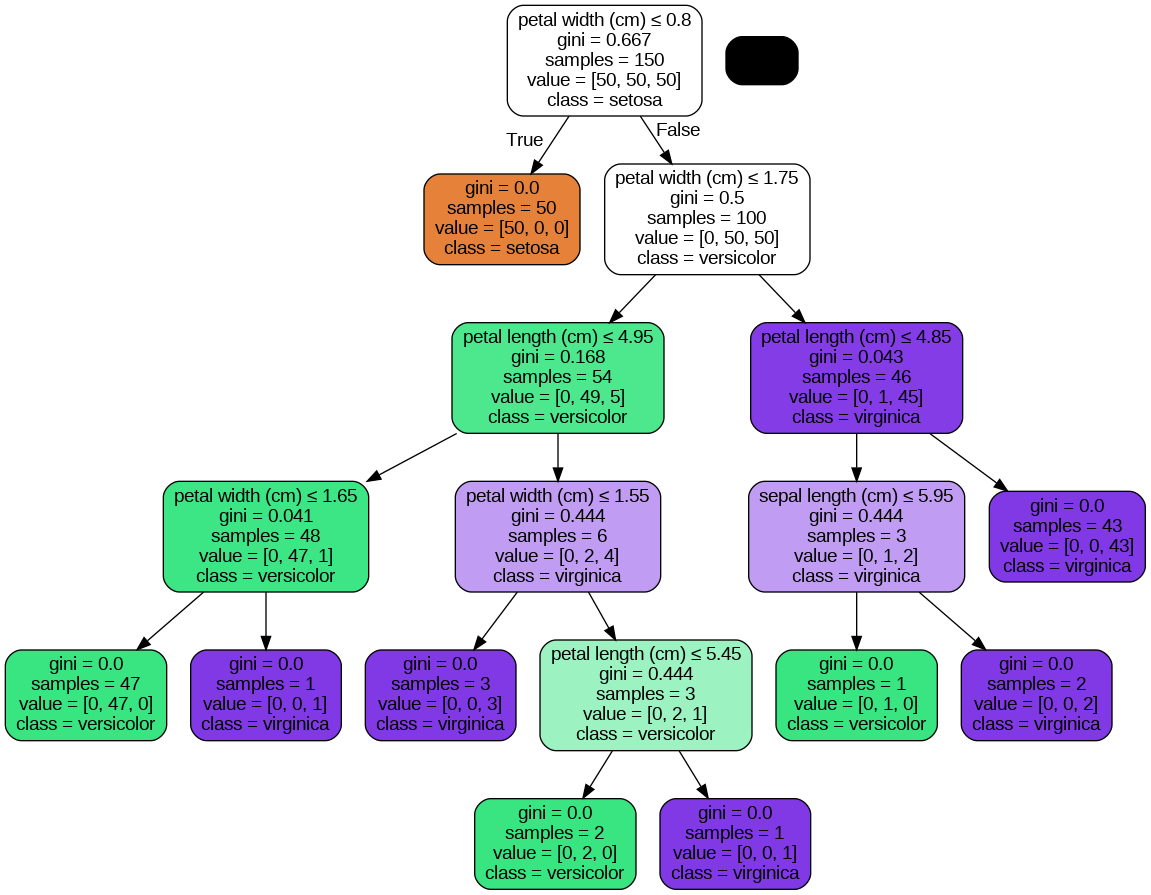

In [50]:
import graphviz, pydotplus
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
Image(pydot_graph.create_png())

# Simple example problems

Define some problem sets:

In [60]:
%matplotlib inline
from pylab import *

def make_dataframe(**kwargs):
    from pandas import DataFrame
    return DataFrame(kwargs)

def my_plot_2D_data(D,T=None):
    if T is None:
        dataframe=D
    else:
        dataframe = make_dataframe( x=D[:,0], y=D[:,1], target=T )
    for target, data in dataframe.groupby("target"):
        plot(data.x, data.y, 'o', label=f"target={target}")
        
from sklearn.datasets import make_blobs, make_moons, make_circles

def my_make_blobs(n=2,a=3, xscale=1, yscale=1, xshift=0,nb_classes=2,n_samples=100):
    centers = [[0,0],[a,a],[a*2,0],[a,-a],
               [a,2*a]]
    D,T = make_blobs(
        n_samples=n_samples,
        centers=centers[0:n],
        cluster_std=1,
        n_features=2, 
        random_state=0
    )
    T = T%nb_classes
    return make_dataframe( x=D[:,0]*xscale+xshift, y=D[:,1]*yscale, target=T )

def my_circles():
    D,T = make_circles(
        n_samples=50,
        shuffle=True,
        noise=0.1,
        random_state=0, 
        factor=0.5
    )
    D2,T2 = make_circles(
        n_samples=100,
        shuffle=True,
        noise=0.05,
        random_state=0, 
        factor=0.5
    )
    D = concatenate((D,4*D2[T2==1,:]), axis=0)
    T = concatenate((T,T2[T2==1]), axis=0)
    return make_dataframe( x=D[:,0], y=D[:,1], target=T )

def my_make_moons():
    D,T = make_moons(
        n_samples=300, 
        shuffle=True,
        noise=0.2, 
        random_state=0
    )
    T = T%2
    return make_dataframe( x=D[:,0], y=D[:,1], target=T )

def make_challange(level):
    if level==0: return my_make_blobs(2)
    elif level==1: return my_make_blobs(3)
    elif level==2: return my_make_blobs(4)
    elif level==3: return my_circles()
    elif level==4: return my_make_moons()
    raise Exception(f"unknown level f{level}")

Display function:

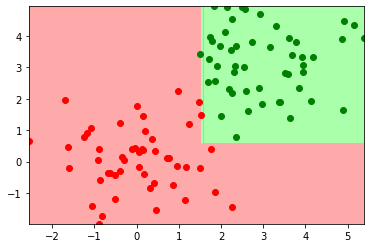

In [90]:
from sklearn.datasets import load_iris
from sklearn import tree

def train_and_show(model, dataframe):
    x = dataframe[["x"]].values.flatten()
    y = dataframe[["y"]].values.flatten()
    label = dataframe[["target"]].values.flatten()*2-1

    X_train = dataframe[["x","y"]].values
    y_train = dataframe[["target"]].values*2-1
    y_train = y_train.reshape(( len(y_train), ))
    model = model.fit(X_train, y_train)    
    
    N=100
    X,Y = meshgrid( linspace(min(x),max(x),N), linspace(min(y),max(y),N) )
    D = stack((X.flatten(), Y.flatten())).transpose()
    T = model.predict(D)
    #print(T.shape)

    T=T.flatten().reshape(X.shape)
    contourf(X,Y,sign(T),colors=['#FFAAAA','#AAFFAA'], extend=True)

    plot( x[label==+1], y[label==+1], 'go' )
    plot( x[label==-1], y[label==-1], 'ro' )
    
    
model = tree.DecisionTreeClassifier()
train_and_show(model, my_make_blobs(2));

## Example classification (simple decision tree)

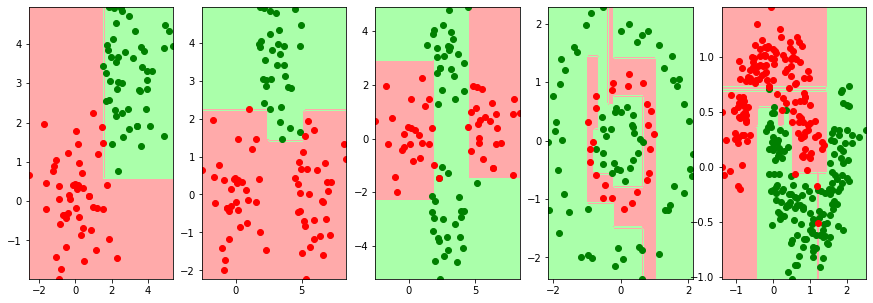

In [91]:
figure(figsize=[15,5])
N=5
idx=0
for n in range(N):
    idx += 1
    subplot(1,N,idx)
    model = tree.DecisionTreeClassifier(random_state=0)
    train_and_show(model, make_challange(n))

# Random forests

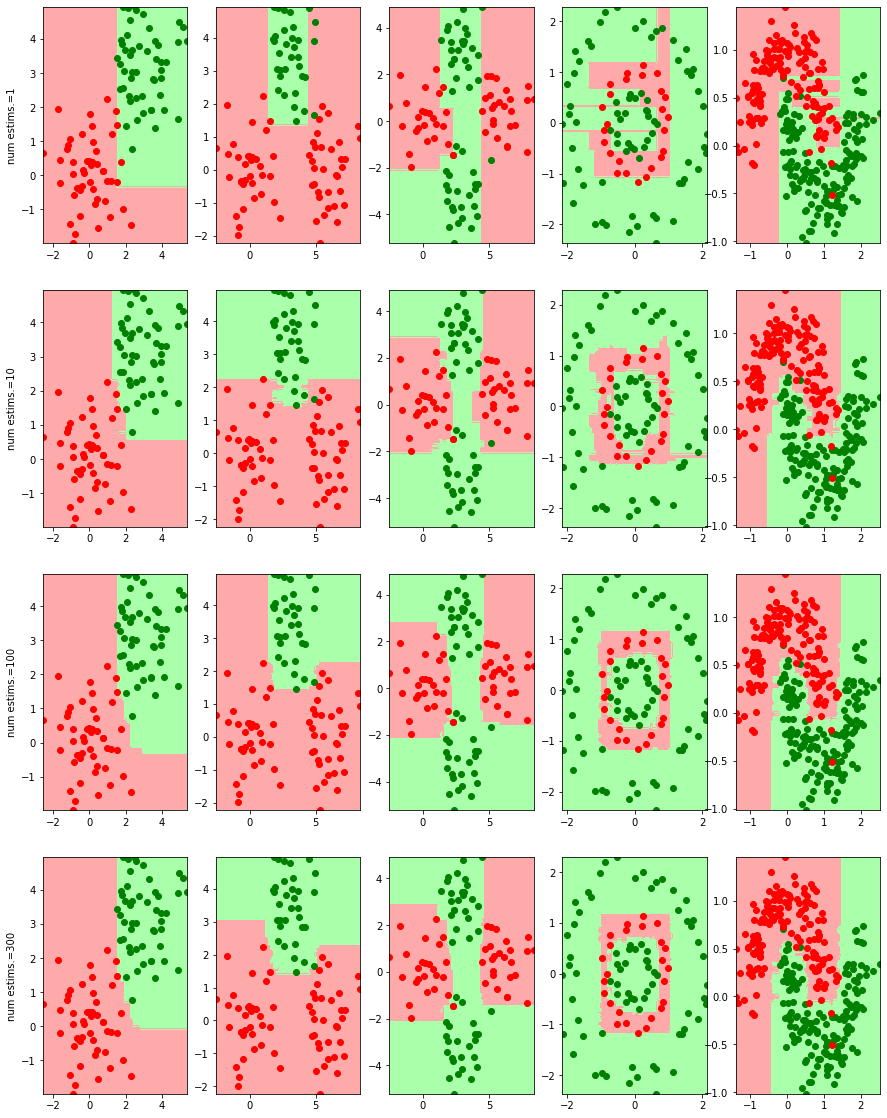

In [95]:
from sklearn.ensemble import RandomForestClassifier
N=5
idx=0
params=[1,10,100,300]
M=len(params)

figure(figsize=[15,5*M])
for m in range(M):   
    for n in range(N):
        if n==1:
            ylabel(f"num estims.={params[m]}")
        idx += 1
        subplot(M,N,idx)
        model = RandomForestClassifier(random_state=0, n_estimators=params[m])
        train_and_show(model, make_challange(n))

## Pruning

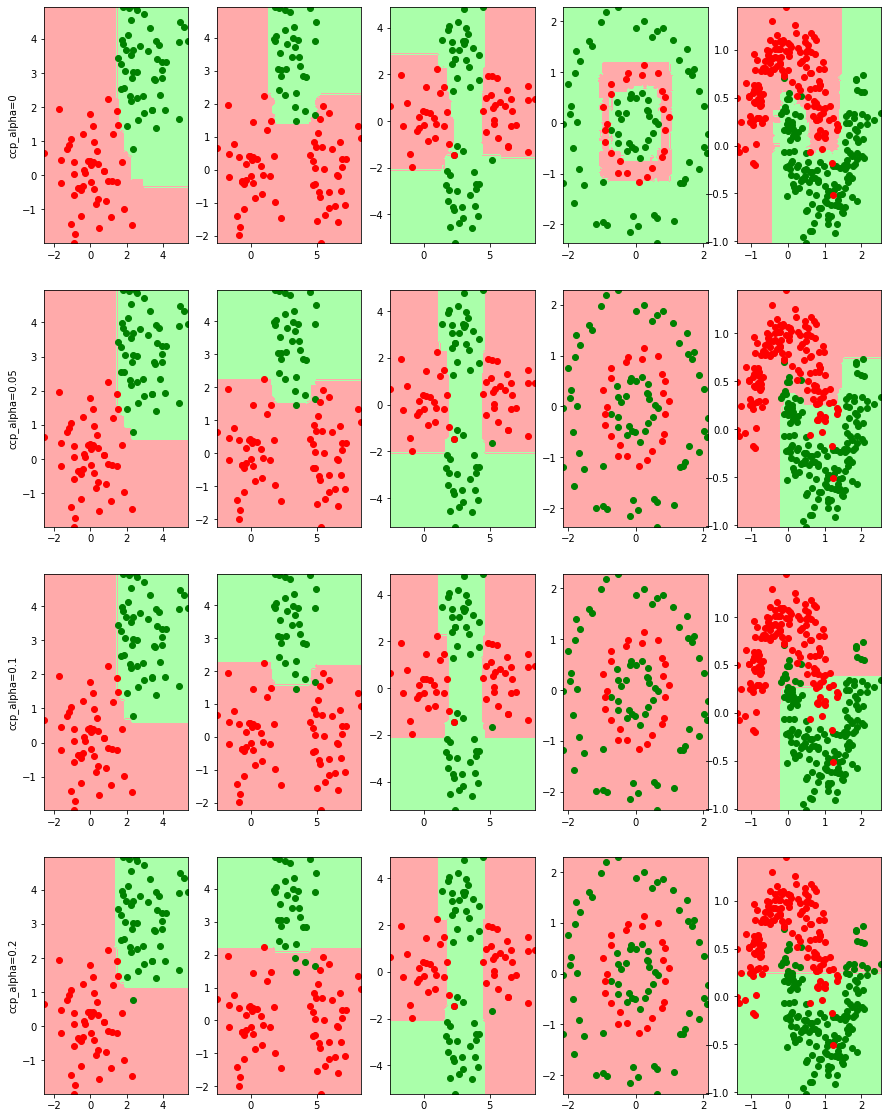

In [96]:
from sklearn.ensemble import RandomForestClassifier
N=5
idx=0
params=[0, 0.05, 0.1, 0.2]
M=len(params)

figure(figsize=[15,5*M])
for m in range(M):   
    for n in range(N):
        if n==1:
            ylabel(f"ccp_alpha={params[m]}")
        idx += 1
        subplot(M,N,idx)
        model = RandomForestClassifier(random_state=0, n_estimators=100, ccp_alpha=params[m])
        train_and_show(model, make_challange(n))